# <center> Gender Biais detection</center>
## <center> Application of the CALISKAN  Paper to french  </center>
### <center> Quillivic Robin </center>
Sources : Semantics derived automatically from language corpora necessarily contain human biases, 2016
Sources : Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings, Bolukbasi, Tolga, 2016

In [1]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import logging
import gensim
import os

import itertools

from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

import matplotlib.pyplot as plt
from random import *

import pandas as pd
import numpy as np
import math

from sklearn.decomposition import PCA
import lib
import fasttext
from gensim.models.wrappers import FastText
import random
from sklearn.metrics import roc_auc_score,accuracy_score

C:\Users\Robin\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Logging code taken from http://rare-technologies.com/word2vec-tutorial/
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Load pre-trained Word2Vec model.
model  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\cc.fr.300.vec', binary=False,limit=70000)
model_lem  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\frWac_no_postag_no_phrase_500_skip_cut100.bin', binary=True,limit=70000)
#model  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\fr_Kyubyong_wordvectors.vec',binary=False,limit=50000)
model_wiki  = gensim.models.KeyedVectors.load_word2vec_format(r'DATA\FR\wiki_fr.vec',binary=False,limit=70000)
model_wiki_lem  = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/Robin/Documents/IMPACT/Notebooks/DATA/FR/ppmi_svd_fr/matrix.txt',binary=False,encoding='latin1')
# normalizeation :
model.init_sims(True)
model_lem.init_sims(True)
model_wiki.init_sims(True)
model_wiki_lem.init_sims(True)

2019-03-21 18:36:06,861 : INFO : loading projection weights from DATA\FR\cc.fr.300.vec
2019-03-21 18:36:24,242 : INFO : loaded (70000, 300) matrix from DATA\FR\cc.fr.300.vec
2019-03-21 18:36:24,243 : INFO : loading projection weights from DATA\FR\frWac_no_postag_no_phrase_500_skip_cut100.bin
2019-03-21 18:36:25,393 : INFO : loaded (70000, 500) matrix from DATA\FR\frWac_no_postag_no_phrase_500_skip_cut100.bin
2019-03-21 18:36:25,394 : INFO : loading projection weights from DATA\FR\wiki_fr.vec
2019-03-21 18:36:48,120 : INFO : loaded (70000, 300) matrix from DATA\FR\wiki_fr.vec
2019-03-21 18:36:48,122 : INFO : loading projection weights from C:/Users/Robin/Documents/IMPACT/Notebooks/DATA/FR/ppmi_svd_fr/matrix.txt
2019-03-21 18:37:25,370 : INFO : loaded (53376, 500) matrix from C:/Users/Robin/Documents/IMPACT/Notebooks/DATA/FR/ppmi_svd_fr/matrix.txt
2019-03-21 18:37:25,371 : INFO : precomputing L2-norms of word weight vectors
2019-03-21 18:37:25,997 : INFO : precomputing L2-norms of word w

## WEAT

In [61]:
#attributes
A = ['un','il','homme','mâle','fils','père','garçon']
B = ['une','elle','femme','femelle','mère','fille']

# targets
X = ['informaticien', 'ingénieur', 'scientifique','docteur'] 
Y = ['infirmière', 'professeure', 'libraire','secrétaire']

# targets
X=['mathématiques', 'algèbre', 'géométrie', 'calcul', 'équation', 'informatique', 'nombre', 'additions']
Y =['poésie', 'art', 'danse', 'littérature', 'roman', 'symphonie', 'drame', 'sculpture']  

In [5]:
for x in X:
    print('Association of',x,'with the attributes A,B is : ',lib.wefat(x,A,B,model)*100)

Association of mathématiques with the attributes A,B is :  0.5737823937213666
Association of algèbre with the attributes A,B is :  -94.77152365158487
Association of géométrie with the attributes A,B is :  -141.75227489128255
Association of calcul with the attributes A,B is :  30.944964056140122
Association of équation with the attributes A,B is :  -144.06799926442193


In [6]:
for x in Y:
    print('Association of',x,'with the attributes A,B is : ',lib.wefat(x,A,B,model)*100)

Association of poésie with the attributes A,B is :  -12.84395300206684
Association of art with the attributes A,B is :  1.6029524040364063
Association of danse with the attributes A,B is :  -14.698579534888268
Association of littérature with the attributes A,B is :  -14.975863801581518
Association of roman with the attributes A,B is :  3.229762152546928


In [62]:
lib.S(X,Y,A,B,model)

0.2954076105019166

In [28]:
e= lib.effet_size(X,Y,A,B,model)
print(' the effect size is',e)

 the effect size is 0.08083034426778109


In [29]:
p = lib.p_values(X,Y,A,B,model)
print(' the p values is',p)

30512
 the ps values is 0.15062744981882448


# Cosntruction of list of attributes

In [3]:
pair_g = [['la','le'],['elle','il'], ['cette', 'cet'],
          ['une','un'],['laquelle', 'lequel'],['celle','celui'],['ma','mon'],
          ['mienne','mien'],['certaine', 'certain'],['aucune', 'aucun']
         ]

pair_g1 = [['fille','garçon'],['maman','papa'],['mère','père'],['fille','fils'],['femelle','mâle'],
           ['reine','roi'],['tante','oncle'],['grand-père','grand-mère'],
           ['femme','homme'],['soeur','frère'],['marraine','parrain']
          ]


pair_g2 = [['belle','beau'],['actrice','acteur'],['serveuse','serveur'],['contente' ,'content'],
           ['petite','petit'],['heureuse','heureux'],['gentille','gentils'],['seule', 'seul'],
           ['créatrice','créateur'],['chanteuse','chanteuse']]

pair_am = [['brebis', 'bélier'], ['chèvre', 'bouc'],['biche', 'cerf'],
           ['chatte', 'chat'], ['jument', 'cheval'],['chienne', 'chien'], ['poule', 'coq'],
           ['louve', 'loup'],['rate', 'rat'],['vache', 'taureau']]

pair_h =[['femme','homme'],['fille','garçon'],['femelle','mâle'],
         ['la','le'],['elle','il'],['une','un'],
         ['seule', 'seul'],['petite','petit'],
         ['jument', 'cheval'],['louve', 'loup']
        ]
pair_all= pair_g+pair_g1+pair_g2+pair_am+pair_h

def from_pair_to_attribute(pair):
    A = []
    B = []
    for i in range(len(pair)):
        A.append(pair[i][1])
        B.append(pair[i][0])
    return([A,B])

DET = from_pair_to_attribute(pair_g)
FAM = from_pair_to_attribute(pair_g1)
SUF = from_pair_to_attribute(pair_g2)
MAM = from_pair_to_attribute(pair_am)
HYB = from_pair_to_attribute(pair_h)
ALL = from_pair_to_attribute(pair_all)

#####################
#    Words   #
#####################


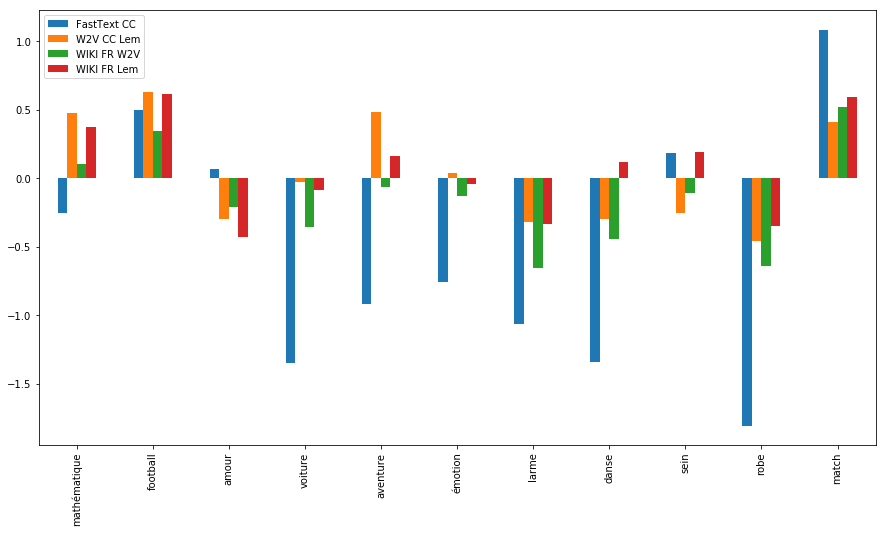

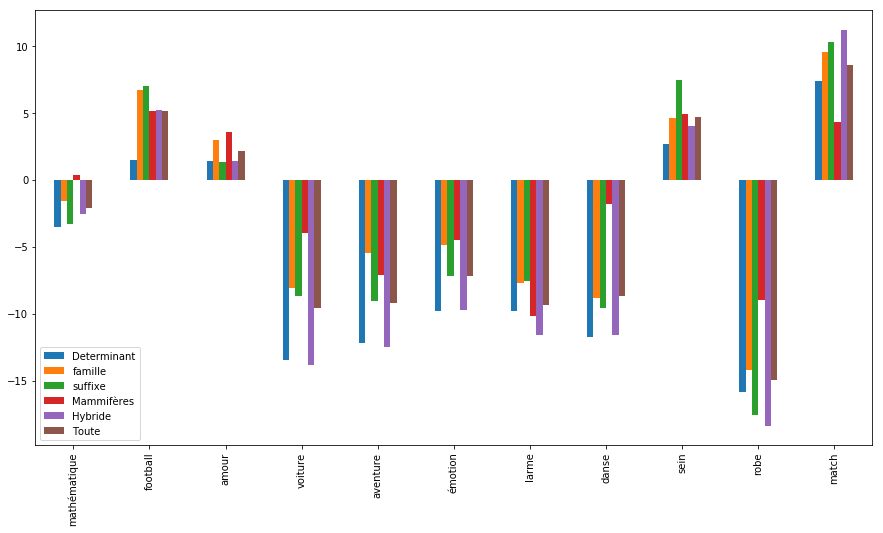

In [5]:
word = ['mathématique','football','amour','voiture','aventure','émotion','larme','danse','sein','robe','match']
A = ['le','il','homme','mâle','père','garçon']
B = ['la','elle','femme','femelle','mère','fille']
print('#####################')
print('#    Words   #')
print('#####################')
def plot_model(word,CAT):
    A,B= CAT[0],CAT[1]
    M,ML,MW,MWL = [],[],[],[]
    MODEL = [model,model_lem,model_wiki,model_wiki_lem]
    MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
    for w in word :
        M.append( lib.s(w,A,B,model)*10)
        ML.append( lib.s(w,A,B,model_lem)*10)
        MW.append( lib.s(w,A,B,model_wiki)*10)
        MWL.append( lib.s(w,A,B,model_wiki_lem)*10)
        
    res = pd.DataFrame(data={'FastText CC':M,'W2V CC Lem':ML,'WIKI FR W2V':MW,'WIKI FR Lem':MWL},index=word)
    res.plot.bar(figsize=(15,8))
    plt.show()
plot_model(word,[A,B])


def plot_pair(word,model):   
    G,G1,G2,GM,GH,ALLi = [],[],[],[],[],[]
    for w in word :
        G.append( lib.s(w,DET[0],DET[1],model)*100)
        G1.append(lib.s(w,FAM[0],FAM[1],model)*100)
        G2.append(lib.s(w,SUF[0],SUF[1],model)*100)
        GM.append(lib.s(w,MAM[0],MAM[1],model)*100)
        GH.append(lib.s(w,HYB[0],HYB[1],model)*100)
        ALLi.append(lib.s(w,ALL[0],ALL[1],model)*100)
    res = pd.DataFrame(data={'Determinant':G,'famille':G1,'suffixe':G2,'Mammifères':GM,'Hybride':GH,'Toute':ALLi},index=word)
    res.plot.bar(figsize=(15,8))
    plt.show()
    
plot_pair(word,model)
plt.show()

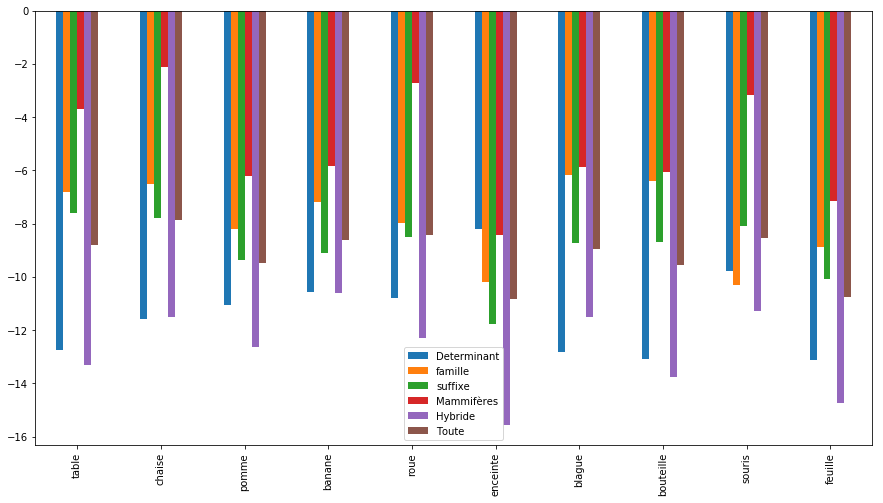

In [6]:
neutral_fem =['table','chaise','pomme','banane','roue','enceinte','blague','bouteille','souris','feuille']
plot_pair(neutral_fem,model)
plt.show()

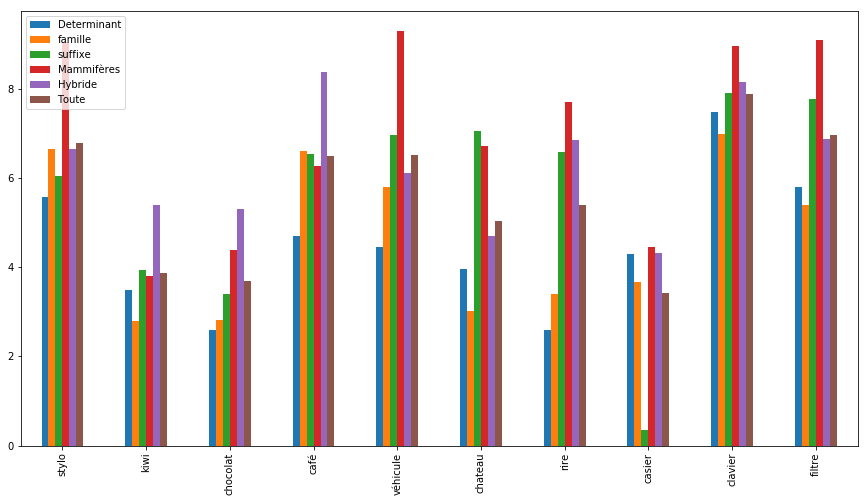

In [7]:
neutral_man =['stylo','kiwi','chocolat','café','véhicule','chateau','rire','casier','clavier','filtre']
plot_pair(neutral_man,model)
plt.show()

#####################
#    MathsWords   #
#####################


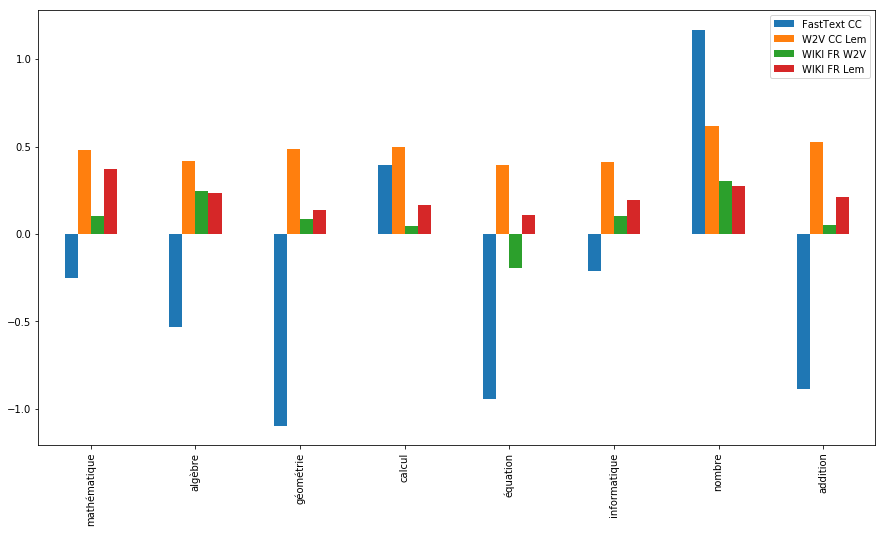

In [48]:
A = ['le','il','homme','mâle','père','garçon']
B = ['la','elle','femme','femelle','mère','fille']
print('#####################')
print('#    MathsWords   #')
print('#####################')
X=['mathématique', 'algèbre', 'géométrie', 'calcul', 'équation', 'informatique', 'nombre', 'addition']
plot(X,A,B)

#####################
#    MathsWords   #
#####################


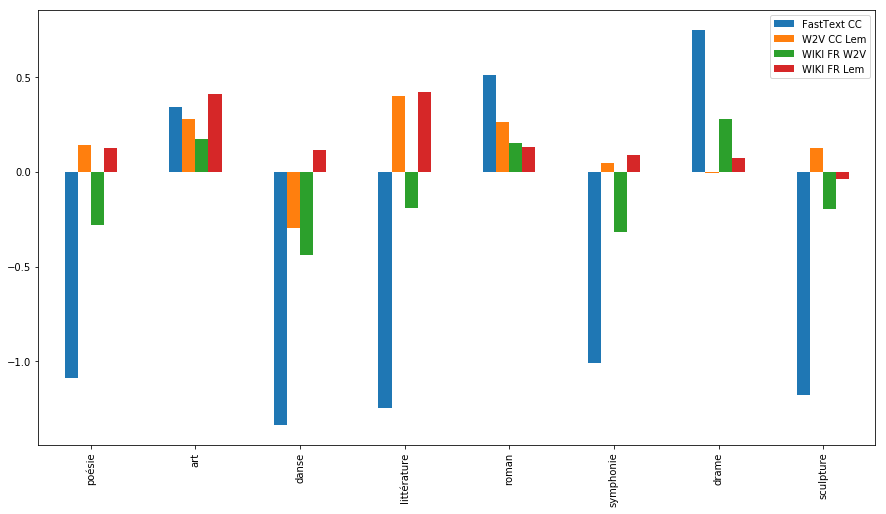

In [49]:
A = ['le','il','homme','mâle','père','garçon']
B = ['la','elle','femme','femelle','mère','fille']
print('#####################')
print('#    MathsWords   #')
print('#####################')
Y =['poésie', 'art', 'danse', 'littérature', 'roman', 'symphonie', 'drame', 'sculpture']
plot(Y,A,B)

## Comment : 
For this example, we do not find any significant p value or effet size. That means , we are not observing any biais. more over, we observe that the sign of the association is direcly correlated with the gramatical gender !

# Does the association coeficient (WEAT and WEFAT) reveal the gramatical gender ?

In [10]:
#Load lexique in a Dataframe
df = pd.read_excel(r'DATA\FR\Lexique382.xlsx',encoding='latin1')

In [32]:
def Gender_Classifier_predict_wefat(corpus,A,B,model):
    """
    predict the gender of a noum based on the wefat score
    """
    Y_pred = []
    for w in corpus:
        if lib.wefat(w,A,B,model)*100>0:
            Y_pred.append(1)
        else :
            Y_pred.append(0)
    return(Y_pred)

def store_score_wefat(A,B,model,lexique):
    _,y = lib.built_X_y(lib.merge_model_lexique(df,model),model)
    corpus = lib.merge_model_lexique(df,model)['Mot'].values
    Y_pred = Gender_Classifier_predict_wefat(corpus,A,B,model)
    Y_pred_rand = np.random.randint(2, size=len(y))
    roc = roc_auc_score(y, Y_pred)
    acc = accuracy_score(y, Y_pred)
    roc_rand = roc_auc_score(y, Y_pred_rand)
    acc_rand = accuracy_score(y, Y_pred_rand)
    return(roc,acc,roc_rand,acc_rand)

def store_result_wefat(MODEL,MODEL_NAME,A,B,lexique):
    ROC,ROC_R = [],[]
    ACC ,ACC_R = [],[]
    for model in MODEL:
        try :
            roc,acc,roc_rand,acc_rand = store_score_wefat(A,B,model,lexique)
        except :
            roc,acc,roc_rand,acc_rand = 0,0,0,0
        ROC.append(roc)
        ACC.append(acc)
        ROC_R.append(roc_rand)
        ACC_R.append(acc_rand)
    df = pd.DataFrame(data = {'ROC':ROC,'ACC':ACC,'ROC_random':ROC_R,'ACC_Random':ACC_R},index=MODEL_NAME)
    return(df)

    

In [71]:
pair_g1 = [['femme','homme'],['maman','papa'],['mère','père'],['femelle','mâle'],
           ['reine','roi'],['tante','oncle'],
           ['fille','garçon'],['marraine','parrain']
          ]
pair_am = [['brebis', 'bélier'], ['chèvre', 'bouc'],['biche', 'cerf'],
            ['jument', 'cheval'], ['poule', 'coq'],
           ['louve', 'loup'],['rate', 'rat'],['vache', 'taureau']]

FAM = from_pair_to_attribute(pair_g1)
MAM = from_pair_to_attribute(pair_am)


In [50]:

print('##########################')
print('#    A,B attributes      #')
print('##########################')
A = ['le','il','homme','mâle','père','garçon']
B = ['la','elle','femme','femelle','mère','fille']

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#    A,B attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.862203,0.850257,0.505615,0.505832
model_lem,0.541835,0.615151,0.498238,0.498158
model_wiki,0.743694,0.746837,0.509120,0.508658
model_wiki_lem,0.513155,0.655409,0.499171,0.499431


In [64]:
A,B= DET[0],DET[1]
##
print('##########################')
print('#    DET attributes      #')
print('##########################')

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#    DET attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.903264,0.892967,0.499148,0.499039
model_lem,0.000000,0.000000,0.000000,0.000000
model_wiki,0.810685,0.798723,0.496181,0.496458
model_wiki_lem,0.000000,0.000000,0.000000,0.000000


In [65]:
A,B= SUF[0],SUF[1]
##
print('##########################')
print('#    SUF attributes      #')
print('##########################')

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#    SUF attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.879831,0.889468,0.499513,0.499657
model_lem,0.540974,0.644541,0.500029,0.499411
model_wiki,0.778882,0.772507,0.499903,0.500303
model_wiki_lem,0.000000,0.000000,0.000000,0.000000


In [70]:
A,B= FAM[0],FAM[1]
##
##
print('##########################')
print('#    FAM attributes      #')
print('##########################')

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#    FAM attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.880074,0.881509,0.498334,0.498525
model_lem,0.545962,0.555876,0.500266,0.500133
model_wiki,0.667005,0.655052,0.496874,0.497397
model_wiki_lem,0.519631,0.653410,0.500062,0.500775


In [72]:
A,B= MAM[0],MAM[1]
##
##
print('##########################')
print('#    MAM attributes      #')
print('##########################')

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#    MAM attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.811239,0.811492,0.498147,0.497564
model_lem,0.509367,0.509056,0.501074,0.502449
model_wiki,0.616668,0.599715,0.503120,0.502755
model_wiki_lem,0.551723,0.512389,0.498913,0.498501


In [67]:
A,B= HYB[0],HYB[1]
##
##
print('##########################')
print('#    HYB attributes      #')
print('##########################')

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#    HYB attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.855190,0.843636,0.498561,0.498628
model_lem,0.528967,0.651149,0.500173,0.498880
model_wiki,0.773267,0.776412,0.500923,0.500938
model_wiki_lem,0.000000,0.000000,0.000000,0.000000


In [73]:
A,B= DET[0]+SUF[0],DET[1]+SUF[1]
##
##
print('##########################')
print('#   DET SUF attributes      #')
print('##########################')

MODEL = [model,model_lem,model_wiki,model_wiki_lem]
MODEL_NAME = ['model','model_lem','model_wiki','model_wiki_lem']
df_0 = store_result_wefat(MODEL,MODEL_NAME,A,B,df)
df_0

##########################
#   DET SUF attributes      #
##########################


,ROC,ACC,ROC_random,ACC_Random
model,0.924549,0.924974,0.500170,0.500172
model_lem,0.000000,0.000000,0.000000,0.000000
model_wiki,0.817317,0.808107,0.497502,0.496943
model_wiki_lem,0.000000,0.000000,0.000000,0.000000


## Comment :
AS we anticipated, the Association play an important role in the grammatical gender. The lesss frequen word an thos who have a coeficient reaaly closed to 0 were linked to false prediction.